In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv("bitcoin.csv")

In [3]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [4]:
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [5]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [15]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
105/105 [==============================] - ETA: 0s - loss: 0.012 - 15s 8ms/step - loss: 0.0121
Epoch 2/100
105/105 [==============================] - 1s 6ms/step - loss: 0.0091
Epoch 3/100
105/105 [==============================] - 1s 6ms/step - loss: 0.0060
Epoch 4/100
105/105 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 5/100
105/105 [==============================] - 1s 6ms/step - loss: 8.7434e-04
Epoch 6/100
105/105 [==============================] - 1s 6ms/step - loss: 2.1816e-04
Epoch 7/100
105/105 [==============================] - 1s 6ms/step - loss: 1.1861e-04
Epoch 8/100
105/105 [==============================] - 1s 6ms/step - loss: 1.0720e-04A: 0s - loss: 7.6808e- - ETA: 0s - loss: 8.9
Epoch 9/100
105/105 [==============================] - 1s 6ms/step - loss: 1.0240e-04
Epoch 10/100
105/105 [==============================] - 1s 6ms/step - loss: 9.7667e-05
Epoch 11/100
105/105 [==============================] - 1s 6ms/step - loss: 9.4615e-05

In [16]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

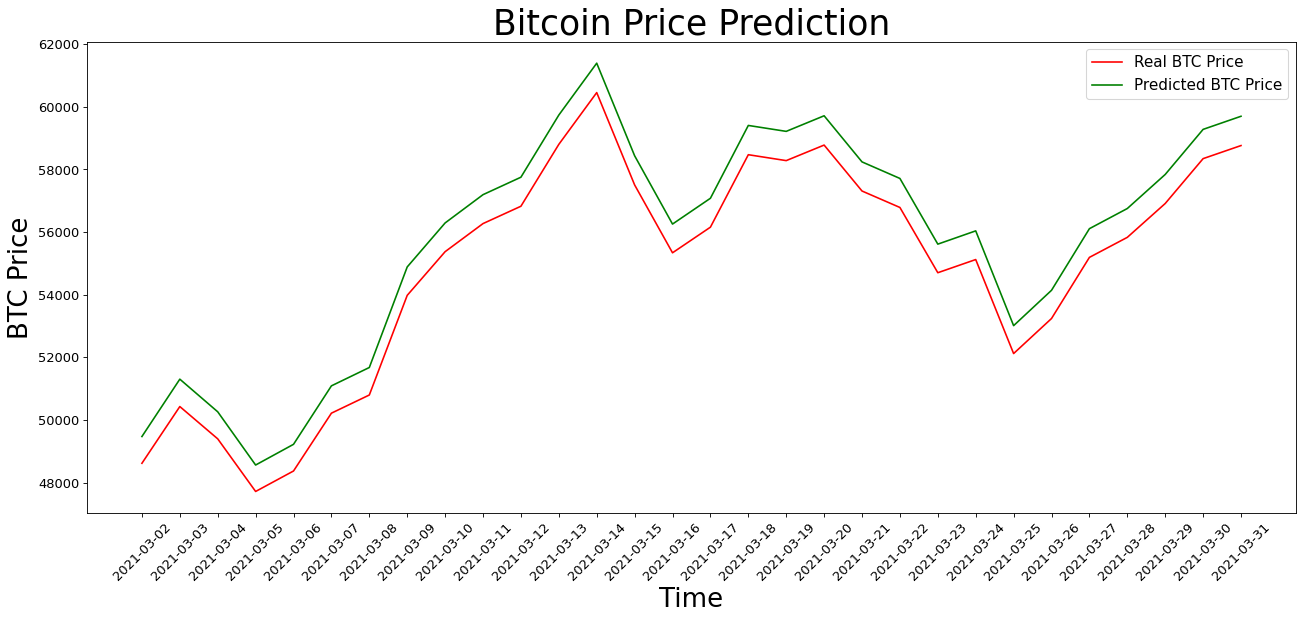

In [17]:
plt.figure(figsize=(20,8), dpi=78, edgecolor='b')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'green', label = 'Predicted BTC Price')
plt.title('Bitcoin Price Prediction', fontsize=32)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = '45')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(12)
plt.xlabel('Time', fontsize=24)
plt.ylabel('BTC Price', fontsize=24)
plt.legend(loc=1, prop={'size': 14})
plt.show()